In [83]:
# Essential cleaning

# Checking if any nulls
# Cech of any full blank column or rows
# Totaly Nulls rows
# Totaly Nulls columns
# Non Variated Feature 
# Checking for Id columns and drop it
# represntation for null vakues

In [84]:
# !pip install missingno --upgrade

In [85]:
# !pip install missingno
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
# load titanic
df=pd.read_csv('C:/Users/bahee/OneDrive/Documents/titanic.csv')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
# check if there are nulls in dataset
df.isna().sum().sum()


866

In [89]:
#Ceck for nulls by feature (Column).
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

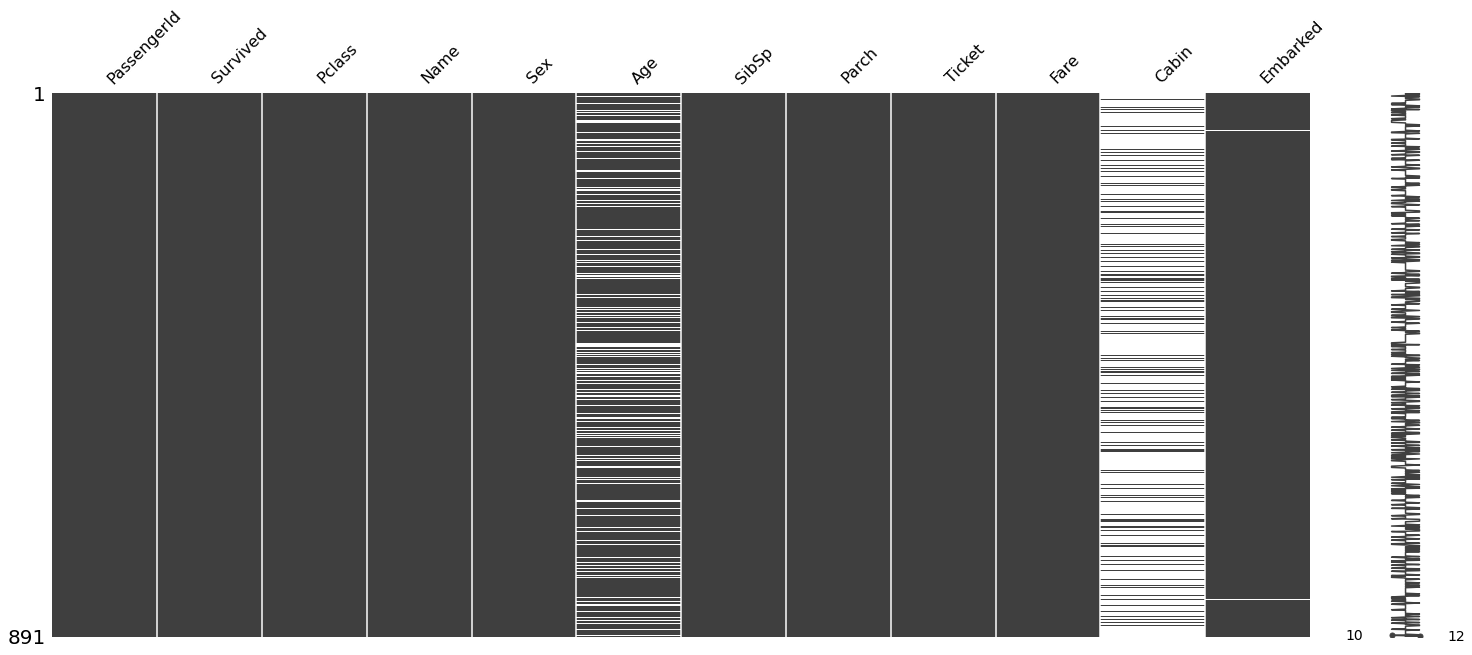

In [90]:
# Missing representation
msno.matrix(df)

<AxesSubplot:>

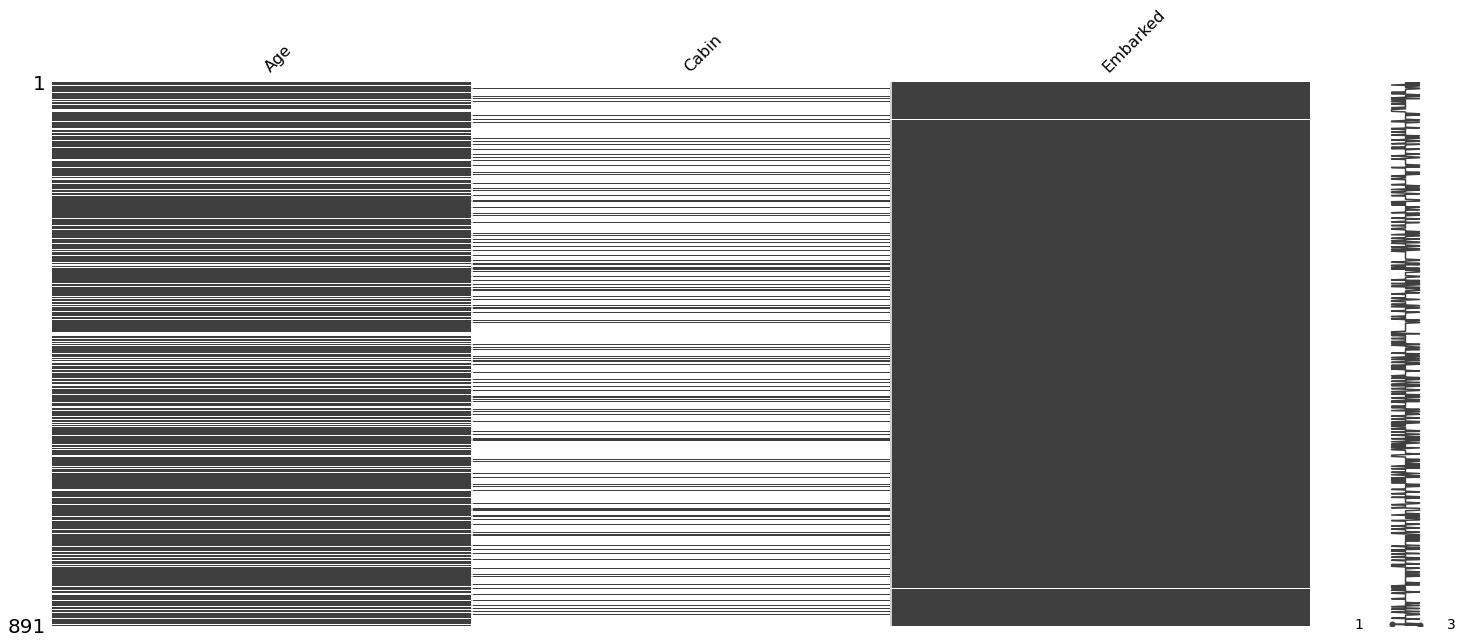

In [91]:
# to represent only columns included nulls
null_columns=df.columns[df.isnull().any()].tolist()
msno.matrix(df[null_columns])


<AxesSubplot:>

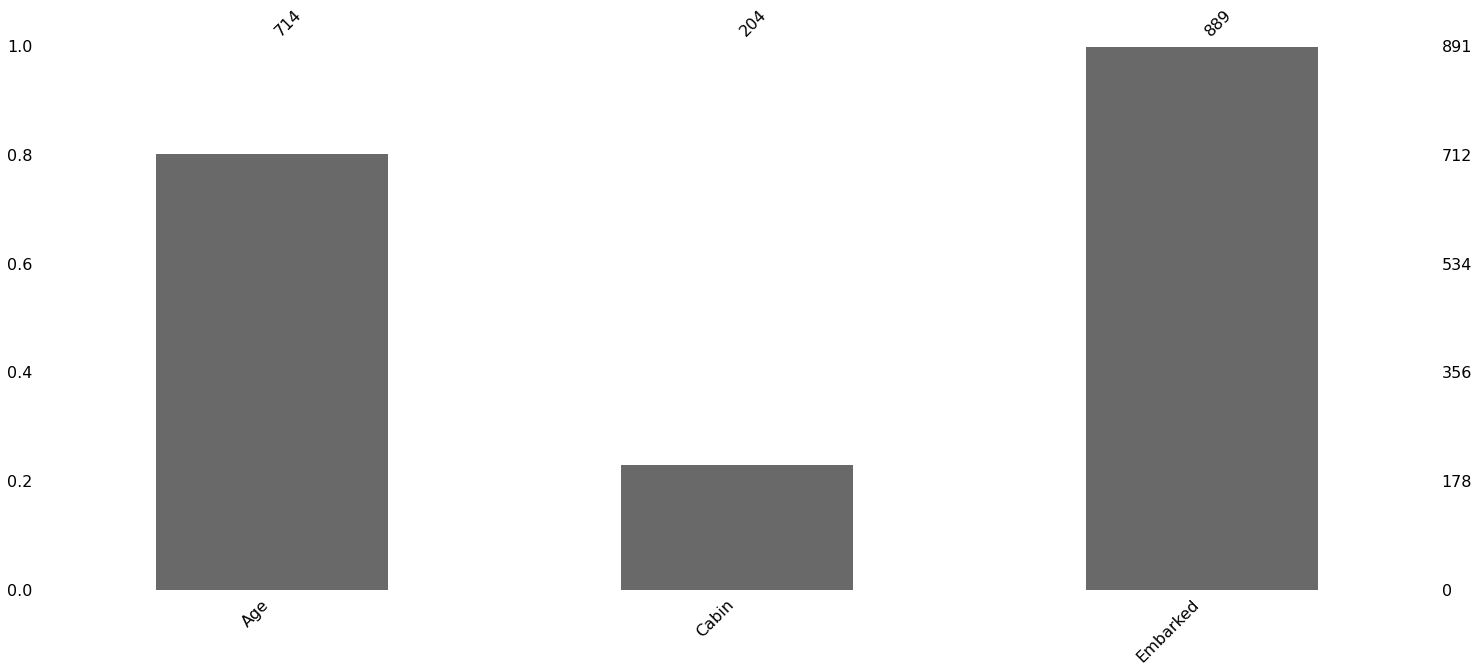

In [92]:
# other type to represent missing is bar plot
msno.bar(df[null_columns])

<AxesSubplot:>

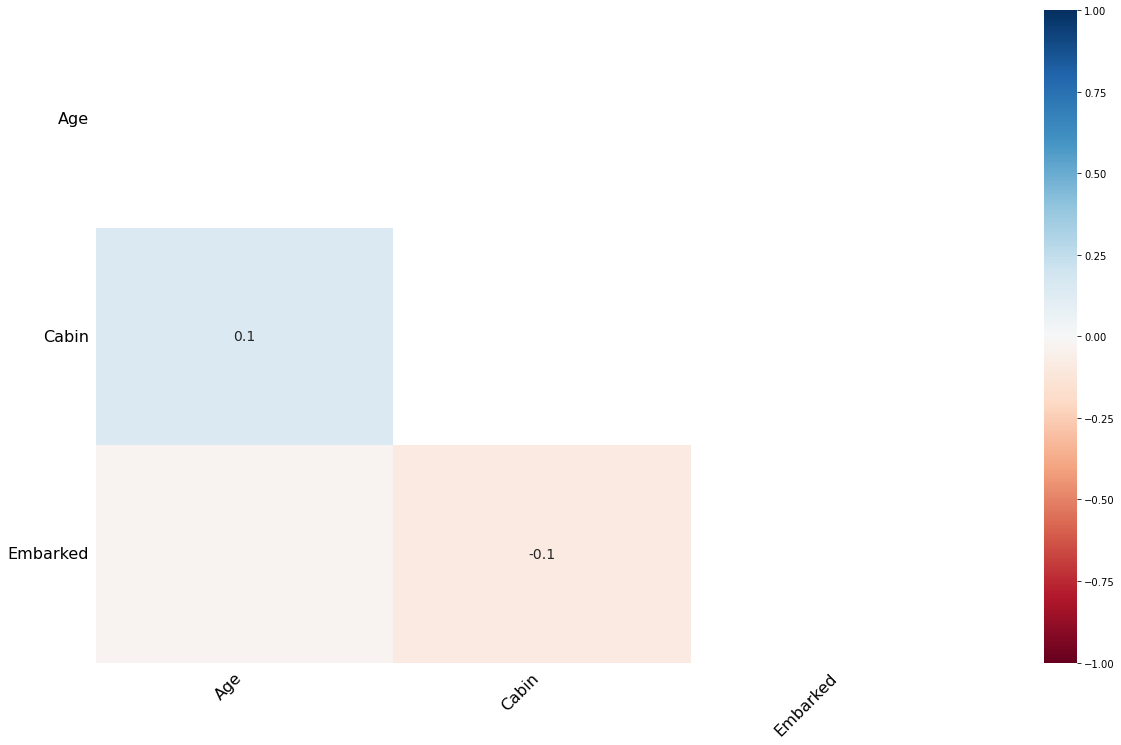

In [93]:
# other type to represent missing is bar plot
msno.heatmap(df[null_columns])

In [94]:
df['blank_column_1']=np.nan
df['blank_column_2']=np.nan

In [95]:
# to check and return of list of indexes for blank columns
null_columns=df.columns[df.isnull().all(axis=0)]
null_columns

Index(['blank_column_1', 'blank_column_2'], dtype='object')

In [96]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,blank_column_1,blank_column_2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,NaN,NaN
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,NaN,NaN


In [97]:
# to drop blank columns
df.drop(null_columns,axis=1,inplace=True)

In [98]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [99]:
df.loc['blank_row']=np.nan

In [100]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C148,C
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,NaN,Q
blank_row,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# to check and return of list of indexes for blank rows
null_rows=df.loc[df.isnull().all(axis=1)].index
null_rows

Index(['blank_row'], dtype='object')

In [102]:
df.drop(null_rows,axis=0,inplace=True)

In [103]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C148,C
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,NaN,Q


In [104]:
df['unvar_column']='unvaried'
df.loc['unvar_row']='unvar_row'

In [105]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,unvar_column
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0,C148,C,unvaried
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,NaN,Q,unvaried
unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row,unvar_row


In [106]:
def drop_un_var_col(df):
    cols_with_one_unique_value = [col for col in df.columns if df[col].nunique() == 1]
    print(cols_with_one_unique_value)
    df.drop(cols_with_one_unique_value,axis=1,inplace=True)
    return df

In [107]:
def drop_un_var_row(df):
    rows_with_one_unique_value = df[df.nunique(axis=1) == 1].index.tolist()
    print(rows_with_one_unique_value)
    df.drop(rows_with_one_unique_value,axis=0,inplace=True)
    return df

In [108]:
drop_un_var_row(df)
drop_un_var_col(df)

['unvar_row']
['unvar_column']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0,NaN,S
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0,B42,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0,C148,C


In [109]:
def detect_id_drop(df):
    # check if any column in the dataframe has 'id' in its name
    id_col = None
    for col in df.columns:
        if 'id' in col.lower():
            id_col = col
            break

    # check if an 'id' column was found
    if id_col is not None:
        # drop the 'id' column
        df = df.drop([id_col], axis=1,inplace=True)
        print(f"Found and dropped 'id' column: {id_col}")
        
    else:
        print("No 'id' column was found in the dataframe.")
        
    # the 'id' column should no longer be in the dataframe



In [110]:
detect_id_drop(df)

Found and dropped 'id' column: PassengerId


In [111]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925,NaN,S
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1,C123,S
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0,NaN,S
887,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0,B42,S
888,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.45,NaN,S
889,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0,C148,C


In [112]:
# most of machine learning algorithm can not deal with nulls
# How to check for any null
# How to check for any id column AND DROP
# How to check for blank column AND DROP
# How to check for constant column(without variation) AND DROP
# How to check for blank row AND DROP
# How to display null valuses using missingno

# next lesson we will learn how to deal with missing values that scattered in data
# in a way to preserve as much data as we can without biased 
# Thanks